In [2]:
import numpy as np
import pandas as pd
import Bio.SeqIO as SeqIO
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import os

# 1. Virus-human pairs(Collected from HPIDB and Filtered)
## 1.1 Data Preprocessing

In [3]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Deep_viral/train_1000.txt", sep= "\t")

In [4]:
data = data.drop_duplicates(keep = 'first')
data

,Human Protein,Virus Protein,Species,Family,HS,VS,MIscore
0,O95251,Q2Q067,11908,11632,MPRRKRNAGSSSDGTEDSDFSTDLEHTDSSESDGTSRRSARVTRSS...,MAASGLFRCLPVSCPEDLLVEELVDGLLSLEEELKDKEEEKAVLDG...,0.490000
1,P17676,P04608,11706,11632,MQRLVAWDPACLPLPPPPPAFKSMEVANFYYEADCLAAAYGGKAAP...,MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,0.297423
2,Q16537,P05919,11706,11632,MSSAPTTPPSVDKVDGFSRKSVRKARQKRSQSSSQFRSQGKPIELT...,QPIPIVAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLI...,0.460000
3,P11166,O56232,11901,11632,MEPSSKKLTGRLMLAVGGAVLGSLQFGYNTGVINAPQKVIEEFYNQ...,MASVVGWGPHSLHACPALVLSNDVTIDAWCPLCGPHERLQFERIDT...,0.327156
4,P52292,P04618,11706,11632,MSTNENANTPAARLHRFKNKGKDSTEMRRRRIEVNVELRKAKKDDQ...,MAGRSGDSDEELIRTVRLIKLLYQSNPPPNPEGTRQARRNRRRRWR...,0.183694
...,...,...,...,...,...,...,...
24693,P0CG04,P0C1C6,928303,11158,GQPKANPTVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADG...,MDKLDLVNDGLDIIDFIQKNQKEIQKTYGRSSIQQPSTKDRTRAWE...,0.350000
24694,P61026,Q77M19,132487,11158,MAKKTYDLLFKLLLIGDSGVGKTCVLFRFSDDAFNTTFISTIGIDF...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,0.350000
24695,Q9UL25,Q77M19,132487,11158,MAAAGGGGGGAAAAGRAYSFKVVLLGEGCVGKTSLVLRYCENKFND...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,0.350000
24696,P26196,Q77M19,132487,11158,MSTARTENPVIMGLSSQNGQLRGPVKPTGGPGGGGTQTQQQMNQLK...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,0.350000


In [5]:
data = data[data.MIscore>=0.3]
data

,Human Protein,Virus Protein,Species,Family,HS,VS,MIscore
0,O95251,Q2Q067,11908,11632,MPRRKRNAGSSSDGTEDSDFSTDLEHTDSSESDGTSRRSARVTRSS...,MAASGLFRCLPVSCPEDLLVEELVDGLLSLEEELKDKEEEKAVLDG...,0.490000
2,Q16537,P05919,11706,11632,MSSAPTTPPSVDKVDGFSRKSVRKARQKRSQSSSQFRSQGKPIELT...,QPIPIVAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLI...,0.460000
3,P11166,O56232,11901,11632,MEPSSKKLTGRLMLAVGGAVLGSLQFGYNTGVINAPQKVIEEFYNQ...,MASVVGWGPHSLHACPALVLSNDVTIDAWCPLCGPHERLQFERIDT...,0.327156
5,P07355,P04591,11706,11632,MSTVHEILCKLSLEGDHSTPPSAYGSVKAYTNFDAERDALNIETAI...,MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,0.327156
6,O96017,P14079,11927,11632,MSRESDVEAQQSHGSSACSQPHGSVTQSQGSSSQSQGISSSSTSTM...,MAHFPGFGQSLLFGYPVYVFGDCVQGDWCPISGGLCSARLHRHALL...,0.336553
...,...,...,...,...,...,...,...
24693,P0CG04,P0C1C6,928303,11158,GQPKANPTVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADG...,MDKLDLVNDGLDIIDFIQKNQKEIQKTYGRSSIQQPSTKDRTRAWE...,0.350000
24694,P61026,Q77M19,132487,11158,MAKKTYDLLFKLLLIGDSGVGKTCVLFRFSDDAFNTTFISTIGIDF...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,0.350000
24695,Q9UL25,Q77M19,132487,11158,MAAAGGGGGGAAAAGRAYSFKVVLLGEGCVGKTSLVLRYCENKFND...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,0.350000
24696,P26196,Q77M19,132487,11158,MSTARTENPVIMGLSSQNGQLRGPVKPTGGPGGGGTQTQQQMNQLK...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,0.350000


In [6]:
data = data[['Human Protein', 'Virus Protein', "HS", "VS"]]
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/deep_viral_human_virus.csv" , index = False)

### 1.2 Exploratory Data Analysis

In [7]:
data= pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files/deep_viral_human_virus.csv" )
data

,Human Protein,Virus Protein,HS,VS
0,O95251,Q2Q067,MPRRKRNAGSSSDGTEDSDFSTDLEHTDSSESDGTSRRSARVTRSS...,MAASGLFRCLPVSCPEDLLVEELVDGLLSLEEELKDKEEEKAVLDG...
1,Q16537,P05919,MSSAPTTPPSVDKVDGFSRKSVRKARQKRSQSSSQFRSQGKPIELT...,QPIPIVAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLI...
2,P11166,O56232,MEPSSKKLTGRLMLAVGGAVLGSLQFGYNTGVINAPQKVIEEFYNQ...,MASVVGWGPHSLHACPALVLSNDVTIDAWCPLCGPHERLQFERIDT...
3,P07355,P04591,MSTVHEILCKLSLEGDHSTPPSAYGSVKAYTNFDAERDALNIETAI...,MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...
4,O96017,P14079,MSRESDVEAQQSHGSSACSQPHGSVTQSQGSSSQSQGISSSSTSTM...,MAHFPGFGQSLLFGYPVYVFGDCVQGDWCPISGGLCSARLHRHALL...
...,...,...,...,...
24249,P0CG04,P0C1C6,GQPKANPTVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADG...,MDKLDLVNDGLDIIDFIQKNQKEIQKTYGRSSIQQPSTKDRTRAWE...
24250,P61026,Q77M19,MAKKTYDLLFKLLLIGDSGVGKTCVLFRFSDDAFNTTFISTIGIDF...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...
24251,Q9UL25,Q77M19,MAAAGGGGGGAAAAGRAYSFKVVLLGEGCVGKTSLVLRYCENKFND...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...
24252,P26196,Q77M19,MSTARTENPVIMGLSSQNGQLRGPVKPTGGPGGGGTQTQQQMNQLK...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...


In [8]:
# print("Maximum length proteins: ", max(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Maximum length of Proteins sequences: ", len(max(set(data['HS']).union(set(data['VS'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data['HS']).union(set(data['VS'])),key=len)))



Maximum length of Proteins sequences:  1000


Minimum length of Proteins sequences:  14


In [9]:
col_list_protein_A = data['Human Protein'].values.tolist()
col_list_protein_B = data['Virus Protein'].values.tolist()
count_col_A = Counter(col_list_protein_A)
count_col_B = Counter(col_list_protein_B)
count = count_col_A | count_col_B
count = dict(sorted(count.items(), key=lambda item: item[1],reverse = True))


<Figure size 1440x1440 with 0 Axes>

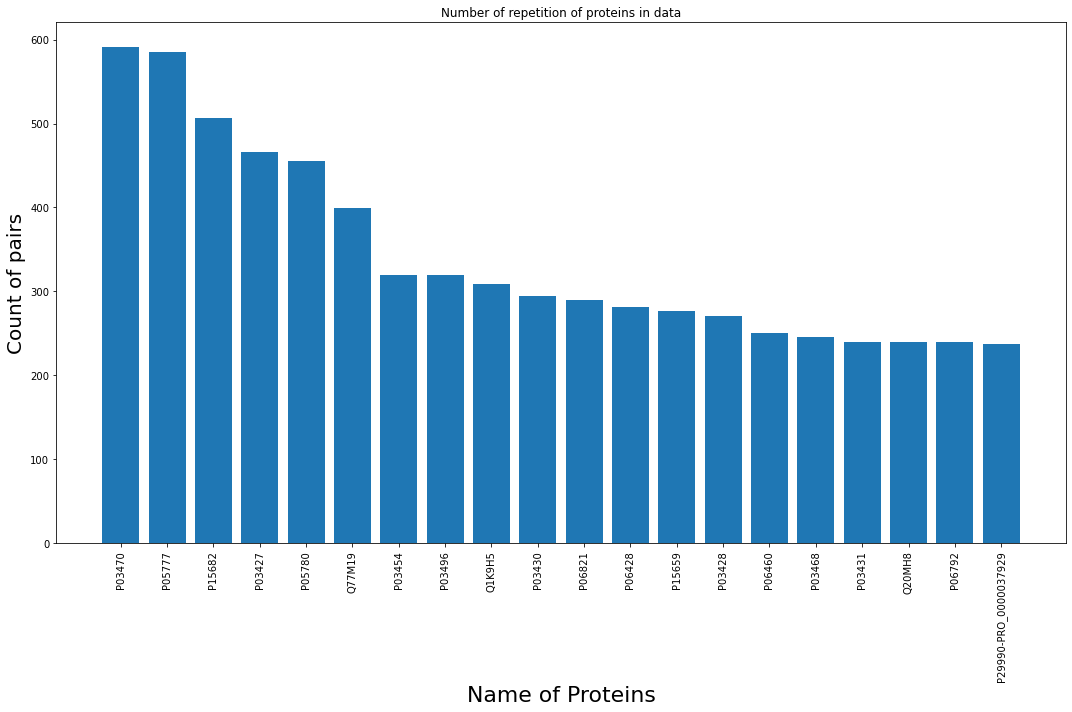

In [10]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

### Summary of EDA
1. Published in paper:  Deep Viral(HPIDB)
2. Number of unique pairs: 
3. Number of proteins: 24254
4. Max length of sequences: 1000
5. Min lenght of sequences: 14
5. Top 5 redundant proteins: 


     'P03470': 591,
     'P05777': 585,
     'P15682': 506,
     'P03427': 466,
     'P05780': 455

# 2. Virus-human pairs(Paper published in Nature communication)
## 2.1 Data Preprocessing

In [11]:
data  = pd.read_excel("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Deep_viral/media-6.xlsx",skiprows = [0])
data

,Bait,Preys,PreyGene,MIST,Saint_BFDR,AvgSpec,FoldChange,Uniprot Protein ID,Uniprot Protein Description,Uniprot Function,Structures (PDB),Uniprot Function in Disease
0,SARS-CoV2 E,O00203,AP3B1,0.963550,0.00,4.67,46.67,AP3B1_HUMAN,AP-3 complex subunit beta-1 (Adaptor protein c...,Subunit of non-clathrin- and clathrin-associa...,NaN,Hermansky-Pudlak syndrome 2 (HPS2) [MIM:60823...
1,SARS-CoV2 E,O60885,BRD4,0.978488,0.00,2.67,26.67,BRD4_HUMAN,Bromodomain-containing protein 4 (Protein HUNK1),Chromatin reader protein that recognizes and ...,2I8N;2LSP;2MJV;2N3K;2NCZ;2ND0;2ND1;2NNU;2OSS;2...,Note=A chromosomal aberration involving BRD4 ...
2,SARS-CoV2 E,P25440,BRD2,0.906593,0.00,7.00,70.00,BRD2_HUMAN,Bromodomain-containing protein 2 (O27.1.1) (Re...,May play a role in spermatogenesis or follicu...,1X0J;2DVQ;2DVR;2DVS;2DVV;2E3K;2G4A;2YDW;2YEK;3...,NaN
3,SARS-CoV2 E,Q6UX04,CWC27,0.893109,0.03,2.67,26.67,CWC27_HUMAN,Spliceosome-associated protein CWC27 homolog (...,"As part of the spliceosome, plays a role in p...",2HQ6;4R3E;5Z56;5Z58;6FF4;6FF7,Retinitis pigmentosa with or without skeletal...
4,SARS-CoV2 E,Q86VM9,ZC3H18,0.796415,0.00,2.67,26.67,ZCH18_HUMAN,Zinc finger CCCH domain-containing protein 18 ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
327,SARS-CoV2 orf9c,Q9Y276,BCS1L,0.992310,0.00,35.00,350.00,BCS1_HUMAN,Mitochondrial chaperone BCS1 (h-BCS1) (BCS1-li...,Chaperone necessary for the assembly of mitoc...,NaN,GRACILE syndrome (GRACILE) [MIM:603358]: GRAC...
328,SARS-CoV2 orf9c,Q9Y375,NDUFAF1,0.762046,0.00,3.67,36.67,CIA30_HUMAN,"Complex I intermediate-associated protein 30, ...",Chaperone protein involved in early stages of...,NaN,"Mitochondrial complex I deficiency, nuclear t..."
329,SARS-CoV2 orf9c,Q9Y3A6,TMED5,0.705393,0.05,2.00,20.00,TMED5_HUMAN,Transmembrane emp24 domain-containing protein ...,Potential role in vesicular protein trafficki...,NaN,NaN
330,SARS-CoV2 orf9c,Q9Y6M9,NDUFB9,0.966178,0.04,2.33,23.33,NDUB9_HUMAN,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,Accessory subunit of the mitochondrial membra...,5XTC;5XTD;5XTH;5XTI,"Mitochondrial complex I deficiency, nuclear t..."


In [12]:
data['bait_type'] = data['Bait'].apply(lambda x: x.split(" ")[1])
data = data[['Bait',"PreyGene"]]

In [13]:
x = set(data['Bait'].unique())

In [29]:
sars_seq = pd.read_excel("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Deep_viral/2020-04-krogan-sarscov2-sequences-uniprot-mapping.xlsx")
sars_seq_dct = {}
for index,row in sars_seq.iterrows():
    if str(row.Sequence)[-1] == "*":
        sars_seq_dct[row['Krogan name']] = str(row.Sequence)[0:-1] 
    else:
        sars_seq_dct[row['Krogan name']] = str(row.Sequence) 
        

In [32]:
human_seq = pd.read_csv("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Deep_viral/genename2uniprot.tab",sep = "\t")

for index,row in human_seq.iterrows():
    if str(row.Sequence)[-1] == "*":
        sars_seq_dct[row['Entry']] = str(row.Sequence)[0:-1] 
        sars_seq_dct[row['yourlist:M20201226A94466D2655679D1FD8953E075198DA8281320U']] = str(row.Sequence)[0:-1] 
        
    else:
        sars_seq_dct[row['Entry']] = str(row.Sequence) 
        sars_seq_dct[row['yourlist:M20201226A94466D2655679D1FD8953E075198DA8281320U']] = str(row.Sequence)

In [41]:

print(len(sars_seq_dct['PITRM1']))
human_seq.head()

1037


,yourlist:M20201226A94466D2655679D1FD8953E075198DA8281320U,Entry,Entry name,Organism,Sequence,Organism ID,Tissue specificity
0,MT-ND4L,P03901,NU4LM_HUMAN,Homo sapiens (Human),MPLIYMNIMLAFTISLLGMLVYRSHLMSSLLCLEGMMLSLFIMATL...,9606,NaN
1,MT-CO2,P00403,COX2_HUMAN,Homo sapiens (Human),MAHAAQVGLQDATSPIMEELITFHDHALMIIFLICFLVLYALFLTL...,9606,NaN
2,ATF5,Q9Y2D1,ATF5_HUMAN,Homo sapiens (Human),MSLLATLGLELDRALLPASGLGWLVDYGKLPPAPAPLAPYEVLGGA...,9606,TISSUE SPECIFICITY: Widely expressed with high...
3,BTF3,O00478,BT3A3_HUMAN,Homo sapiens (Human),MKMASSLAFLLLNFHVSLFLVQLLTPCSAQFSVLGPSGPILAMVGE...,9606,TISSUE SPECIFICITY: Detected in peripheral blo...
4,BTF3,P20290,BTF3_HUMAN,Homo sapiens (Human),MRRTGAPAQADSRGRGRARGGCPGGEATLSQPPPRGGTRGQEPQMK...,9606,NaN


In [36]:
def return_seq_sars(name):
    
    if len(sars_seq_dct[name]) <= 1024:
        return  str(sars_seq_dct[name])
    
    return np.nan
data['PreyGene'] = data.PreyGene.str.upper()

In [42]:
data['Sars Sequence'] = data['Bait'].apply(return_seq_sars)
data['Human Sequence'] = data['PreyGene'].apply(return_seq_sars)

In [43]:
data.dropna(inplace = True)
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/sars_ppi_nature_with_sequences.csv",index = False)

### 2.2 Exploratory Data Analysis

In [44]:
data = pd.read_csv('../csv_files/sars_ppi_nature_with_sequences.csv')
data.head(30)

,Bait,PreyGene,Sars Sequence,Human Sequence
0,SARS-CoV2 E,BRD2,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MLQNVTPHNKLPGEGNAGLLGLGPEAAAPGKRIRKPSLLYEGFESP...
1,SARS-CoV2 E,CWC27,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MSNIYIQEPPTNGKVLLKTTAGDIDIELWSKEAPKACRNFIQLCLE...
2,SARS-CoV2 E,ZC3H18,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MDVAESPERDPHSPEDEEQPQGLSDDDILRDSGSDQDLDGAGVRAS...
3,SARS-CoV2 E,SLC44A2,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MGDERPHYYGKHGTPQKYDPTFKGPIYNRGCTDIICCVFLLLAIVG...
4,SARS-CoV2 M,PMPCB,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MAAAAARVVLSSAARRRLWGFSESLLIRGAAGRSLYFGENRLRSTQ...
5,SARS-CoV2 M,YIF1A,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MAYHSGYGAHGSKHRARAAPDPPPLFDDTSGGYSSQPGGYPATGAD...
6,SARS-CoV2 M,ATP1B1,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MARGKAKEEGSWKKFIWNSEKKEFLGRTGGSWFKILLFYVIFYGCL...
7,SARS-CoV2 M,ACADM,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MAAGFGRCCRVLRSISRFHWRSQHTKANRQREPGLGFSFEFTEQQK...
8,SARS-CoV2 M,ETFA,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MFRAAAPGQLRRAASLLRFQSTLVIAEHANDSLAPITLNTITAATR...
9,SARS-CoV2 M,STOM,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MAEKRHTRDSEAQRLPDSFKDSPSKGLGPCGWILVAFSFLFTVITF...


In [45]:
print("Number of positive pairs: ", len(data))

Number of positive pairs:  281


In [46]:
print("Number of unique Proteins: ", len(set(data['Bait']).union(set(data['PreyGene']))) )

Number of unique Proteins:  307


In [47]:
# print("Maximum length proteins: ", max(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Maximum length of Proteins sequences: ", len(max(set(data['Sars Sequence']).union(set(data['Human Sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data['Sars Sequence']).union(set(data['Human Sequence'])),key=len)))



Maximum length of Proteins sequences:  1019


Minimum length of Proteins sequences:  13
